In [29]:
import networkx as nx
import numpy as np

In [36]:
name = 'example_3x3'

In [37]:
g = nx.read_graphml(f"./{name}.graphml")
w = np.load(f"./{name}.weights.npy")

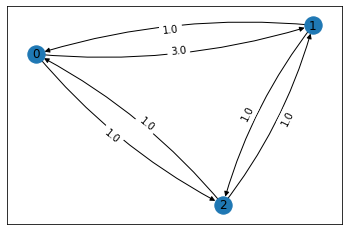

In [79]:
pos = nx.spring_layout(g)
nx.draw_networkx(g, pos=pos, with_labels=True, connectionstyle='arc3,rad=0.1')
elabels = {(u,v): data['weight'] for u, v, data in g.edges(data=True)}
labels = draw_networkx_edge_labels(g, pos, edge_labels=elabels,
                                   label_pos=0.5,
                                   offset=0.1
                                  )


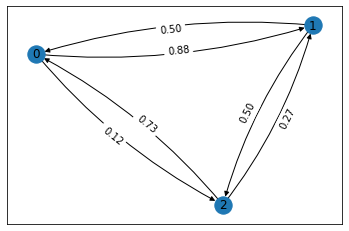

In [81]:
#pos = nx.spring_layout(g)
nx.draw_networkx(g, pos=pos, with_labels=True, connectionstyle='arc3,rad=0.1')
elabels = {(u,v): f"{w[i]:0.2f}" for i, (u, v) in enumerate(g.edges)}
draw_networkx_edge_labels(g, pos, edge_labels=elabels, offset=0.1)
None

In [77]:
from networkx.utils import is_string_like

def draw_networkx_edge_labels(G, pos,
                              edge_labels=None,
                              label_pos=0.5,
                              font_size=10,
                              font_color='k',
                              font_family='sans-serif',
                              font_weight='normal',
                              alpha=None,
                              bbox=None,
                              ax=None,
                              rotate=True,
                              **kwds):
    """Draw edge labels.

    Parameters
    ----------
    G : graph
       A networkx graph

    pos : dictionary
       A dictionary with nodes as keys and positions as values.
       Positions should be sequences of length 2.

    ax : Matplotlib Axes object, optional
       Draw the graph in the specified Matplotlib axes.

    alpha : float or None
       The text transparency (default=None)

    edge_labels : dictionary
       Edge labels in a dictionary keyed by edge two-tuple of text
       labels (default=None). Only labels for the keys in the dictionary
       are drawn.

    label_pos : float
       Position of edge label along edge (0=head, 0.5=center, 1=tail)

    font_size : int
       Font size for text labels (default=12)

    font_color : string
       Font color string (default='k' black)

    font_weight : string
       Font weight (default='normal')

    font_family : string
       Font family (default='sans-serif')

    bbox : Matplotlib bbox
       Specify text box shape and colors.

    clip_on : bool
       Turn on clipping at axis boundaries (default=True)

    Returns
    -------
    dict
        `dict` of labels keyed on the edges

    Examples
    --------
    >>> G = nx.dodecahedral_graph()
    >>> edge_labels = nx.draw_networkx_edge_labels(G, pos=nx.spring_layout(G))

    Also see the NetworkX drawing examples at
    https://networkx.github.io/documentation/latest/auto_examples/index.html

    See Also
    --------
    draw()
    draw_networkx()
    draw_networkx_nodes()
    draw_networkx_edges()
    draw_networkx_labels()
    """
    try:
        import matplotlib.pyplot as plt
        import numpy as np
    except ImportError:
        raise ImportError("Matplotlib required for draw()")
    except RuntimeError:
        print("Matplotlib unable to open display")
        raise
        
    offset = kwds.pop("offset", 0.0)

    if ax is None:
        ax = plt.gca()
    if edge_labels is None:
        labels = {(u, v): d for u, v, d in G.edges(data=True)}
    else:
        labels = edge_labels
    text_items = {}
    for (n1, n2), label in labels.items():
        (x1, y1) = pos[n1]
        (x2, y2) = pos[n2]
        _norm = ((x2-x1)**2 + (y2-y1)**2)**0.5
        (x, y) = (x1 * label_pos + x2 * (1.0 - label_pos),
                  y1 * label_pos + y2 * (1.0 - label_pos))
        x += offset * (y2-y1)/_norm
        y += offset * -(x2-x1)/_norm

        if rotate:
            # in degrees
            angle = np.arctan2(y2 - y1, x2 - x1) / (2.0 * np.pi) * 360
            # make label orientation "right-side-up"
            if angle > 90:
                angle -= 180
            if angle < - 90:
                angle += 180
            # transform data coordinate angle to screen coordinate angle
            xy = np.array((x, y))
            trans_angle = ax.transData.transform_angles(np.array((angle,)),
                                                        xy.reshape((1, 2)))[0]
        else:
            trans_angle = 0.0
        # use default box of white with white border
        if bbox is None:
            bbox = dict(boxstyle='round',
                        ec=(1.0, 1.0, 1.0),
                        fc=(1.0, 1.0, 1.0),
                        )
        if not is_string_like(label):
            label = str(label)  # this makes "1" and 1 labeled the same

        # set optional alignment
        horizontalalignment = kwds.get('horizontalalignment', 'center')
        verticalalignment = kwds.get('verticalalignment', 'center')

        t = ax.text(x, y,
                    label,
                    size=font_size,
                    color=font_color,
                    family=font_family,
                    weight=font_weight,
                    alpha=alpha,
                    horizontalalignment=horizontalalignment,
                    verticalalignment=verticalalignment,
                    rotation=trans_angle,
                    transform=ax.transData,
                    bbox=bbox,
                    zorder=1,
                    clip_on=True,
                    )
        text_items[(n1, n2)] = t

    ax.tick_params(
        axis='both',
        which='both',
        bottom=False,
        left=False,
        labelbottom=False,
        labelleft=False)

    return text_items